In [30]:
# importing the required libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [31]:
# Reading the data and assinging names to the columns

names=["sepal_width", "sepal_length", "petal_width", "petal_length", "class"]
data = pd.read_csv("iris.csv", names=names)
data.head()

,sepal_width,sepal_length,petal_width,petal_length,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [33]:
# getting some insights of the data

print("Shape of data:", data.shape)
print("\n\nData group:\n",data.groupby("class").size())
print("\n\nStatistical summary:\n",data.describe())

Shape of data: (150, 5)


Data group:
 class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


Statistical summary:
        sepal_width  sepal_length  petal_width  petal_length
count   150.000000    150.000000   150.000000    150.000000
mean      5.843333      3.054000     3.758667      1.198667
std       0.828066      0.433594     1.764420      0.763161
min       4.300000      2.000000     1.000000      0.100000
25%       5.100000      2.800000     1.600000      0.300000
50%       5.800000      3.000000     4.350000      1.300000
75%       6.400000      3.300000     5.100000      1.800000
max       7.900000      4.400000     6.900000      2.500000


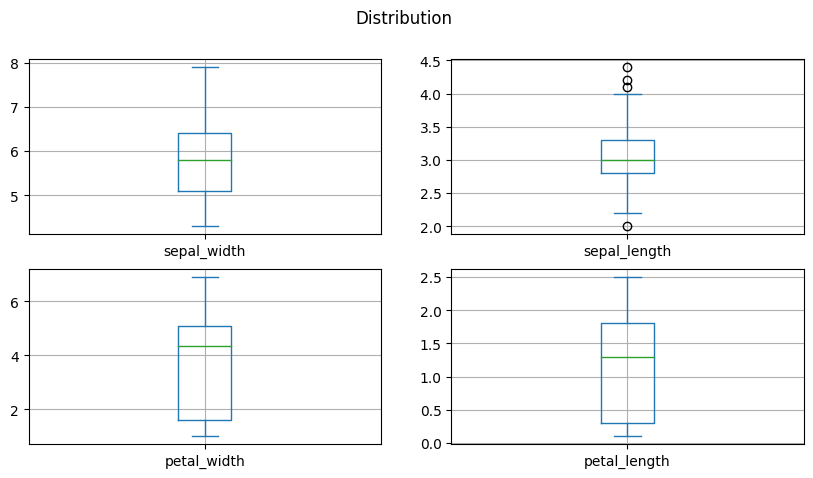

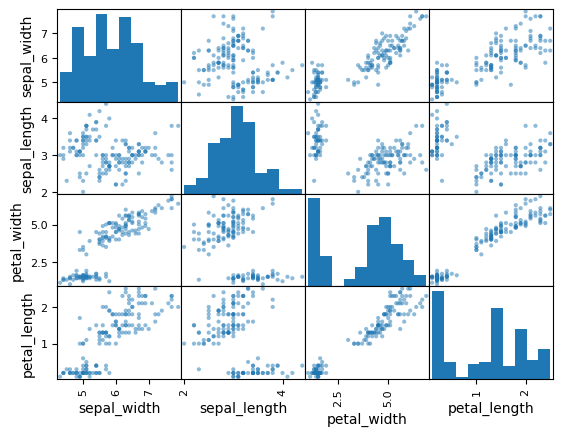

In [73]:
# Visualizing the data

data.plot(kind="box", subplots=True, layout=(2,2), title="Distribution", grid=True, figsize=(10,5))
plt.show()

# plt.title("Relationship between variables")
pd.plotting.scatter_matrix(data, grid=True,)
plt.show()

In [44]:
# Split train and validation set

array = data.values
X = array[:,0:4]
y = array[:,4]
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.2, random_state=1, shuffle=True)

In [46]:
# Spot Check Algorithms

models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models

[('LR', LogisticRegression(multi_class='ovr', solver='liblinear')),
 ('LDA', LinearDiscriminantAnalysis()),
 ('KNN', KNeighborsClassifier()),
 ('CART', DecisionTreeClassifier()),
 ('NB', GaussianNB()),
 ('SVM', SVC(gamma='auto'))]

LR : 0.9416666666666667 ( 0.06508541396588878 )
LDA : 0.975 ( 0.03818813079129868 )
KNN : 0.9583333333333333 ( 0.04166666666666669 )
CART : 0.9583333333333333 ( 0.041666666666666685 )
NB : 0.95 ( 0.05527707983925667 )
SVM : 0.9833333333333332 ( 0.03333333333333335 )


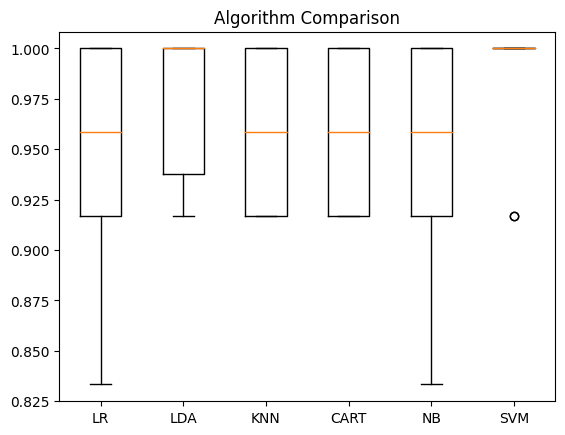

In [56]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print(name, ":", cv_results.mean(), "(",cv_results.std(),")")
    
# Visualizing the comparison result
plt.boxplot(results, labels=names)
plt.title("Algorithm Comparison")
plt.show()

In [57]:
# Selecting a model for predictions i.e SVM in this case

model = SVC(gamma="auto")
model.fit(X_train,Y_train)
Y_predict = model.predict(X_test)

In [64]:
# Verifying the predictions

print("Accuracy:", accuracy_score(Y_test, Y_predict))
print("\n\nConfustion Matrix:\n", confusion_matrix(Y_test, Y_predict))
print("\n\nClassification report:\n", classification_report(Y_test, Y_predict))

Accuracy: 0.9666666666666667


Confustion Matrix:
 [[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


Classification report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

